# CallMeMaybe

## Objetivo

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

## 1. Inicialización

Se cargan las librerías.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
from scipy import stats as st
import math as mth

Se cargan los datos.

In [2]:
dataset = pd.read_csv('telecom_dataset_us.csv')
clients = pd.read_csv('telecom_clients_us.csv')

## 2. Preprocesamiento de Datos

Se hace el preprocesamiento de datos y un análisis exploratorio para facilitar una comprensión inicial de los datos.

In [3]:
print(dataset.head(10))
print()
dataset.info()
print()
print(clients.head(10))
print()
clients.info()

   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False     880022.0   
5   166377  2019-08-05 00:00:00+03:00       out    False     880020.0   
6   166377  2019-08-05 00:00:00+03:00       out    False     880020.0   
7   166377  2019-08-05 00:00:00+03:00        in    False          NaN   
8   166377  2019-08-05 00:00:00+03:00       out    False     880020.0   
9   166377  2019-08-06 00:00:00+03:00        in    False          NaN   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0             

### 2.1 Corrección de datos

#### Conversión de datos

Se corrige el tipo de datos en las columnas del dataframe 'dataset'

In [4]:
# Se corrige el tipo de datos en la columna 'date' del dataframe 'dataset' a datetime

dataset['date'] = pd.to_datetime(pd.to_datetime(dataset['date']).dt.date)

# Se corrige el tipo de datos en la columna 'internal' del dataframe 'dataset' a bool
dataset['internal'] = dataset['internal'].astype(bool)

# Se corrige el tipo de datos en la columna 'operator_id' del dataframe 'dataset' a Int64

dataset['operator_id'] = dataset['operator_id'].astype('Int64')
print(dataset.head())
print()
dataset.info()

   user_id       date direction  internal  operator_id  is_missed_call  \
0   166377 2019-08-04        in     False         <NA>            True   
1   166377 2019-08-05       out      True       880022            True   
2   166377 2019-08-05       out      True       880020            True   
3   166377 2019-08-05       out      True       880020           False   
4   166377 2019-08-05       out     False       880022            True   

   calls_count  call_duration  total_call_duration  
0            2              0                    4  
1            3              0                    5  
2            1              0                    1  
3            1             10                   18  
4            3              0                   25  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id  

Se corrige el tipo de datos en las columnas del dataframe 'clients'

In [5]:
# Se corrige el tipo de datos en la columna 'date_start' del dataframe 'clients' a datetime

clients['date_start'] = pd.to_datetime(clients['date_start'])
print(clients.head())
print()
clients.info()

   user_id tariff_plan date_start
0   166713           A 2019-08-15
1   166901           A 2019-08-23
2   168527           A 2019-10-29
3   167097           A 2019-09-01
4   168193           A 2019-10-16

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


### 2.2 Manejo de datos ausentes y duplicados

#### Manejo de datos ausentes

Se revisan las líneas de los datos ausentes de la columna operator_id del dataframe 'dataset'.

In [6]:
print(dataset[dataset['operator_id'].isna()])

       user_id       date direction  internal  operator_id  is_missed_call  \
0       166377 2019-08-04        in     False         <NA>            True   
7       166377 2019-08-05        in     False         <NA>            True   
9       166377 2019-08-06        in     False         <NA>            True   
17      166377 2019-08-07        in     False         <NA>            True   
27      166377 2019-08-12        in     False         <NA>            True   
...        ...        ...       ...       ...          ...             ...   
53876   168601 2019-11-27        in     False         <NA>            True   
53880   168601 2019-11-28        in     False         <NA>            True   
53889   168603 2019-11-28        in     False         <NA>            True   
53893   168606 2019-11-08        in     False         <NA>            True   
53901   168606 2019-11-19        in     False         <NA>            True   

       calls_count  call_duration  total_call_duration  
0     

Se revisan los valores de las diferentes columnas cuando hay un valor ausente en 'operator_id'.

In [7]:
print(dataset[dataset['operator_id'].isna()].value_counts('user_id'))
print()
print(dataset[dataset['operator_id'].isna()].value_counts('direction'))
print()
print(dataset[dataset['operator_id'].isna()].value_counts('internal'))
print()
print(dataset[dataset['operator_id'].isna()].value_counts('is_missed_call'))
print()
print(dataset[dataset['operator_id'].isna()].value_counts('call_duration'))

user_id
168252    145
166405    122
166582    118
166782    117
166658    111
         ... 
166507      1
168225      1
167981      1
168010      1
167113      1
Name: count, Length: 305, dtype: int64

direction
in     7972
out     200
Name: count, dtype: int64

internal
False    7760
True      412
Name: count, dtype: int64

is_missed_call
True     8050
False     122
Name: count, dtype: int64

call_duration
0       8050
229        3
50         2
8890       2
4937       2
        ... 
382        1
374        1
369        1
31         1
1290       1
Name: count, Length: 110, dtype: int64


Se puede observar que la mayoría de las llamadas fueron entrantes, externas, llamadas perdidas y con duración 0. Se verá ahora si hay alguna correlación entre estas columnas.

In [8]:
print(dataset[dataset['operator_id'].isna()].value_counts(
    ['direction', 'internal', 'is_missed_call', 'call_duration']))
print()
print(dataset[dataset['operator_id'].isna()].value_counts(
    ['direction', 'internal', 'is_missed_call']))

direction  internal  is_missed_call  call_duration
in         False     True            0                7536
           True      True            0                 363
out        False     True            0                 116
           True      True            0                  35
           False     False           170                 2
                                                      ... 
in         False     False           3955                1
                                     3129                1
                                     2059                1
                                     2017                1
                                     23658               1
Name: count, Length: 117, dtype: int64

direction  internal  is_missed_call
in         False     True              7536
           True      True               363
out        False     True               116
in         False     False               67
out        False     False               41
    

De las 8172 filas con operador faltante, 7536 son llamadas perdidas, externas y entrantes con duración 0, por lo que podemos asumir que dichas llamadas no se alcanzan a asignar a algún operador y por eso aparecen como ausentes. De las 636 líneas restantes, 122 no son llamadas perdidas, este número de llamadas es un porcentaje muy bajo a comparación del total.

Como el análisis pretende informar sobre el desempeño de los operadores, lo más conveniente es eliminar las filas donde no se haya registrado el número de operador.

In [9]:
# Se filtran las filas con operador asignado

dataset = dataset[dataset['operator_id'].notna()]
print()
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 45730 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45730 non-null  int64         
 1   date                 45730 non-null  datetime64[ns]
 2   direction            45730 non-null  object        
 3   internal             45730 non-null  bool          
 4   operator_id          45730 non-null  Int64         
 5   is_missed_call       45730 non-null  bool          
 6   calls_count          45730 non-null  int64         
 7   call_duration        45730 non-null  int64         
 8   total_call_duration  45730 non-null  int64         
dtypes: Int64(1), bool(2), datetime64[ns](1), int64(4), object(1)
memory usage: 2.9+ MB


#### Manejo de duplicados

Se revisa si existen datos duplicados en el dataframe.

In [10]:
# Se revisa el dataframe 'dataset' por datos duplicados

print('Líneas duplicadas en el dataframe =', dataset.duplicated().sum())

Líneas duplicadas en el dataframe = 4184


Se observan 4184 líneas duplicadas, se indaga más sobre este hecho.

In [11]:
# Se visualizan las líneas duplicadas

print(dataset[dataset.duplicated()])

       user_id       date direction  internal  operator_id  is_missed_call  \
8       166377 2019-08-05       out     False       880020            True   
44      166377 2019-08-14       out     False       880026           False   
51      166377 2019-08-15       out     False       880026           False   
62      166377 2019-08-19       out     False       880026           False   
78      166377 2019-08-22       out     False       880026            True   
...        ...        ...       ...       ...          ...             ...   
53861   168601 2019-11-20       out     False       952914            True   
53869   168601 2019-11-25        in     False       952914           False   
53874   168601 2019-11-26        in     False       952914           False   
53885   168603 2019-11-20       out     False       959118            True   
53900   168606 2019-11-15       out      True       957922           False   

       calls_count  call_duration  total_call_duration  
8     

In [12]:
# Se toma el primer 'user_id' y se visualizan sus datos

print(dataset[dataset['user_id'] == 166377].sort_values('date'))

     user_id       date direction  internal  operator_id  is_missed_call  \
1     166377 2019-08-05       out      True       880022            True   
2     166377 2019-08-05       out      True       880020            True   
3     166377 2019-08-05       out      True       880020           False   
4     166377 2019-08-05       out     False       880022            True   
5     166377 2019-08-05       out     False       880020           False   
..       ...        ...       ...       ...          ...             ...   
567   166377 2019-11-28       out     False       880026           False   
569   166377 2019-11-28        in     False       880028           False   
564   166377 2019-11-28       out     False       880028            True   
566   166377 2019-11-28        in     False       880022           False   
570   166377 2019-11-28       out     False       880028           False   

     calls_count  call_duration  total_call_duration  
1              3              0 

In [13]:
# Se toma el primer 'operator_id' y se visualizan sus datos

print(dataset[dataset['operator_id'] == 880020].sort_values('date'))

     user_id       date direction  internal  operator_id  is_missed_call  \
2     166377 2019-08-05       out      True       880020            True   
3     166377 2019-08-05       out      True       880020           False   
5     166377 2019-08-05       out     False       880020           False   
6     166377 2019-08-05       out     False       880020            True   
8     166377 2019-08-05       out     False       880020            True   
11    166377 2019-08-06       out     False       880020            True   
13    166377 2019-08-06       out     False       880020           False   
16    166377 2019-08-07       out     False       880020           False   
76    166377 2019-08-22        in     False       880020           False   
125   166377 2019-09-02       out     False       880020            True   
124   166377 2019-09-02       out      True       880020            True   
144   166377 2019-09-05        in     False       880020           False   
157   166377

No es raro que para un mismo usuario o un mismo operador haya más de una llamada en un día, lo que es raro es que todas las estadísticas de esa llamada se repitan por completo (por ejemplo que la duración de la llamada y la duración de la llamada total sean las mismas en varias líneas).
 
Por lo anterior, se determina que el mejor curso de acción es eliminar las líneas completamente duplicadas.

In [14]:
# Se eliminan las líneas duplicadas

dataset.drop_duplicates(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41546 entries, 1 to 53899
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              41546 non-null  int64         
 1   date                 41546 non-null  datetime64[ns]
 2   direction            41546 non-null  object        
 3   internal             41546 non-null  bool          
 4   operator_id          41546 non-null  Int64         
 5   is_missed_call       41546 non-null  bool          
 6   calls_count          41546 non-null  int64         
 7   call_duration        41546 non-null  int64         
 8   total_call_duration  41546 non-null  int64         
dtypes: Int64(1), bool(2), datetime64[ns](1), int64(4), object(1)
memory usage: 2.7+ MB


### 2.3 Congruencia entre datos

Las características de las llamadas deben ser congruentes con los siguientes puntos:
- Una llamada perdida tiene una duración de 0 (la duración total de la llamada puede ser mayor).
- La duración total de la llamada (incluyendo el tiempo de espera) es mayor a la duración de la llamada.
- La duración de la llamada o la duración total de la llamada no son menores a 0.

A continuación se revisan estas correlaciones.

In [15]:
# Se verifican las filas donde hay llamadas perdidas con duración distinta de 0

print('Llamadas perdidas con duración distinta de 0 =',len(dataset[(dataset['is_missed_call'] == True) & (dataset['call_duration'] != 0)]))

Llamadas perdidas con duración distinta de 0 = 296


Independientemente de las características de las llamadas, ninguna llamada perdida puede tener una duración mayor a 0, por lo que estas filas se tienen que eliminar.

In [16]:
# Se eliminan las llamadas perdidas con duración distinta de 0

dataset = dataset[~((dataset['is_missed_call'] == True) & (dataset['call_duration'] != 0))]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41250 entries, 1 to 53899
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              41250 non-null  int64         
 1   date                 41250 non-null  datetime64[ns]
 2   direction            41250 non-null  object        
 3   internal             41250 non-null  bool          
 4   operator_id          41250 non-null  Int64         
 5   is_missed_call       41250 non-null  bool          
 6   calls_count          41250 non-null  int64         
 7   call_duration        41250 non-null  int64         
 8   total_call_duration  41250 non-null  int64         
dtypes: Int64(1), bool(2), datetime64[ns](1), int64(4), object(1)
memory usage: 2.6+ MB


Ahora se verifica la relación en sentido inverso.

In [17]:
# Se verifican las filas donde hay duración de 0 con llamadas no perdidas

print('Llamadas no perdidas con duración igual a 0 =',len(dataset[(dataset['is_missed_call'] == False)
                                                           & (dataset['call_duration'] == 0)]))

Llamadas no perdidas con duración igual a 0 = 17


Estas filas también se deben eliminar, ya que una llamada no perdida debe tener una duración mayor a 0.

In [18]:
# Se eliminan las llamadas no perdidas con duración igual a 0

dataset = dataset[~((dataset['is_missed_call'] == False) & (dataset['call_duration'] == 0))]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41233 entries, 1 to 53899
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              41233 non-null  int64         
 1   date                 41233 non-null  datetime64[ns]
 2   direction            41233 non-null  object        
 3   internal             41233 non-null  bool          
 4   operator_id          41233 non-null  Int64         
 5   is_missed_call       41233 non-null  bool          
 6   calls_count          41233 non-null  int64         
 7   call_duration        41233 non-null  int64         
 8   total_call_duration  41233 non-null  int64         
dtypes: Int64(1), bool(2), datetime64[ns](1), int64(4), object(1)
memory usage: 2.6+ MB


Por último se verifican las durarciones de las llamadas.

In [19]:
# Se verifican las filas donde la duración de la llamada es mayor a la duración total de la llamada

print('Llamadas con duración mayor a la duración total =',len(dataset[dataset['call_duration'] > dataset['total_call_duration']]))

Llamadas con duración mayor a la duración total = 0


In [20]:
# Se verfican las filas donde la duración de la llamada o la duración total de la llamada son negativas

print('Llamadas con duración negativa =',len(dataset[dataset['call_duration'] < 0]))
print('Llamadas con duración total negativa =',len(dataset[dataset['total_call_duration'] < 0]))

Llamadas con duración negativa = 0
Llamadas con duración total negativa = 0


Aún se tiene que entender mejor los valores de la columna `calls_count`, ya que no sabemos que tipo de llamadas está contando, si los de un solo usuario, los de un solo operador o por cierto tipo de llamadas. A continuación se verifican varios datos para entenderlo (se parte de la suposición de que el conteo de llamadas es por día).

In [21]:
# Se revisa cuántas veces aparece cada id de usuario y de operador por día

print(dataset.groupby(['date', 'user_id']).size().sort_values(ascending=False).head(20))
print()
print(dataset.groupby(['date', 'operator_id']).size().sort_values(ascending=False).head(20))

date        user_id
2019-11-28  168187     84
2019-11-27  168187     83
2019-11-21  168187     81
2019-11-22  168187     80
2019-10-29  168187     80
2019-11-11  168187     80
2019-11-25  168187     78
2019-11-20  168187     78
2019-11-26  168187     78
2019-11-05  168187     75
2019-10-30  168187     74
2019-11-18  168187     74
2019-11-08  168187     74
2019-11-19  168187     74
2019-10-24  168187     73
2019-10-22  168187     73
2019-11-13  168187     73
2019-10-28  168187     72
2019-10-21  168187     71
2019-10-25  168187     71
dtype: int64

date        operator_id
2019-11-07  924960         7
2019-11-25  940630         6
2019-11-14  901884         6
2019-10-30  924946         6
2019-09-04  901884         6
            900892         6
2019-11-28  940622         6
2019-11-20  906406         6
2019-11-12  951508         6
            940658         6
            924960         6
2019-10-21  937810         6
2019-10-07  906406         6
2019-09-01  900892         6
2019-11-25  9055

Se observa que no es el contador de llamadas por usuario o por operador al día, pero a juzgar por los números, tal vez esté relacionado con los operadores.

Otra manera de contar llamadas sería de una manera más específica como por tipo de llamada, y hay 3 características (entrante o saliente, interna  o externa, contestada o prdida) con 2 categorías cada una. Si las llamadas no se cuentan de manera general por usuario o por operador en el día, la siguiente manera lógica sería hacerlo por cada combinación de las 3 cararcterísticas (un total de 8 categorías).
Con esto en cuenta, se puede observar que las veces que un operador aparece en cada día no supera las 8 veces (solo hay uno que aparece 7 días). Se pone a prueba esta suposición.

In [22]:
# Se agrupan los usuarios y los operadores por día y por cada combinación de las 3 características (dirección, interna y llamada perdida)

grouped = dataset.groupby(
    ['date', 'user_id', 'direction', 'internal', 'is_missed_call']).size().reset_index(name='count_user')
print(grouped.sort_values('count_user', ascending=False).head(10))
print()
grouped_op = dataset.groupby(
    ['date', 'operator_id', 'direction', 'internal', 'is_missed_call']).size().reset_index(name='count_operator')
print(grouped_op.sort_values('count_operator', ascending=False).head(10))
print()
print('Lista del número de veces que aparece un usuario por día y por cada combinación de las 3 características:')
print(grouped['count_user'].unique())
print()
print('Lista del número de veces que aparece un operador por día y por cada combinación de las 3 características:')
print(grouped_op['count_operator'].unique())

            date  user_id direction  internal  is_missed_call  count_user
5423  2019-10-03   167626       out     False            True          31
7805  2019-10-15   167626       out     False           False          31
17735 2019-11-20   168187        in     False           False          30
11152 2019-10-28   168187        in     False           False          30
7806  2019-10-15   167626       out     False            True          30
3987  2019-09-25   167626       out     False           False          30
19196 2019-11-25   168187        in     False           False          29
5422  2019-10-03   167626       out     False           False          29
4402  2019-09-27   167626       out     False           False          29
4403  2019-09-27   167626       out     False            True          29

            date  operator_id direction  internal  is_missed_call  \
11683 2019-10-09       912684        in      True           False   
7099  2019-09-26       908960        in      Tr

Se observa que la suposición era correcta. Se puede inferir que los usuarios pueden ser atendidos popr varios operadores en el día pero que los operadores solo pueden atender a un solo usuario en el día. Nos aseguramos de esto último para saber si se eliminan las filas de los operadorers cuyas combinaciones se repitieron.

In [23]:
# Se indga sobre las combinaciones repetidas de los operadores

print(dataset[dataset.duplicated(subset=['date', 'operator_id', 'direction',
      'internal', 'is_missed_call'], keep=False)].sort_values(['date', 'operator_id']))

       user_id       date direction  internal  operator_id  is_missed_call  \
6210    166541 2019-09-26        in      True       908960           False   
6212    166541 2019-09-26        in      True       908960           False   
29989   167272 2019-10-09        in      True       912684           False   
29990   167272 2019-10-09        in      True       912684           False   

       calls_count  call_duration  total_call_duration  
6210             1            393                  423  
6212             1             15                   32  
29989            1            123                  175  
29990            1              4                   25  


Se observa que hay 2 pares de líneas que tienen diferente información sobre cierta categoría de llamada (combinación de las 3 características) de 2 operadores en 1 día en específico, por lo que se procede a eliminarlas ya que no se sabe si hubo un mal registro de las líneas.

In [24]:
# Se eliminan las filas anteriores

dataset = dataset[~dataset.duplicated(subset=['date', 'operator_id', 'direction',
      'internal', 'is_missed_call'], keep=False)]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41229 entries, 1 to 53899
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              41229 non-null  int64         
 1   date                 41229 non-null  datetime64[ns]
 2   direction            41229 non-null  object        
 3   internal             41229 non-null  bool          
 4   operator_id          41229 non-null  Int64         
 5   is_missed_call       41229 non-null  bool          
 6   calls_count          41229 non-null  int64         
 7   call_duration        41229 non-null  int64         
 8   total_call_duration  41229 non-null  int64         
dtypes: Int64(1), bool(2), datetime64[ns](1), int64(4), object(1)
memory usage: 2.6+ MB


### 2.4 Enriquecimiento de datos

Se agrega la columna de tiempo de espera.

In [25]:
# Se crea la columna de tiempo de espera

dataset['wait_time'] = dataset['total_call_duration'] - dataset['call_duration']
print(dataset.head())
print()
dataset.info()

   user_id       date direction  internal  operator_id  is_missed_call  \
1   166377 2019-08-05       out      True       880022            True   
2   166377 2019-08-05       out      True       880020            True   
3   166377 2019-08-05       out      True       880020           False   
4   166377 2019-08-05       out     False       880022            True   
5   166377 2019-08-05       out     False       880020           False   

   calls_count  call_duration  total_call_duration  wait_time  
1            3              0                    5          5  
2            1              0                    1          1  
3            1             10                   18          8  
4            3              0                   25         25  
5            2              3                   29         26  

<class 'pandas.core.frame.DataFrame'>
Index: 41229 entries, 1 to 53899
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ----

Se crea un da dataset con la información de cada operador por día.

In [26]:
# Se suman los valores por día para cada operador para las métricas que lo requieren

dataset_daily = dataset.groupby(['date', 'operator_id'], as_index=False).agg(
    {'calls_count': 'sum', 'call_duration': 'sum', 'wait_time': 'sum'})

# Se saca el número de llamadas perdidas por día para cada operador

missed_calls = dataset[dataset['is_missed_call']].groupby(
    ['date', 'operator_id'], as_index=False).agg({'calls_count': 'sum', 'wait_time': 'sum'})

missed_calls.rename(columns={'calls_count': 'missed_calls_count', 'wait_time': 'missed_wait_time'}, inplace=True)

# Se combinan las dos tablas

dataset_daily = pd.merge(dataset_daily, missed_calls, on=[
                         'date', 'operator_id'], how='left').fillna(0)

# Se añade el promedio de duración de llamada y de tiempo de espera

dataset_daily['avg_call_duration'] = (dataset_daily['call_duration'] / dataset_daily['calls_count']).round(2)
dataset_daily['avg_wait_time'] = (dataset_daily['wait_time'] / dataset_daily['calls_count']).round(2)
dataset_daily['avg_missed_wait_time'] = (dataset_daily['missed_wait_time'] / dataset_daily['missed_calls_count']).round(2)
dataset_daily['avg_missed_wait_time'] = dataset_daily['avg_missed_wait_time'].fillna(0)

dataset_daily['missed_calls_count'] = dataset_daily['missed_calls_count'].astype(int)
dataset_daily['missed_wait_time'] = dataset_daily['missed_wait_time'].astype(int)

# Se agrega columna 'missed_calls_ratio'

dataset_daily['missed_calls_ratio'] = (dataset_daily['missed_calls_count'] / dataset_daily['calls_count']).round(4)
dataset_daily['missed_calls_ratio'] = dataset_daily['missed_calls_ratio'].fillna(0)

print(dataset_daily.head())
print()
dataset_daily.info()

        date  operator_id  calls_count  call_duration  wait_time  \
0 2019-08-02       879896           13             31        254   
1 2019-08-02       879898            5            132         66   
2 2019-08-02       880240            1              0          4   
3 2019-08-03       879896           11             54        263   
4 2019-08-03       879898           16            908        199   

   missed_calls_count  missed_wait_time  avg_call_duration  avg_wait_time  \
0                   8               139               2.38          19.54   
1                   4                53              26.40          13.20   
2                   1                 4               0.00           4.00   
3                   7               189               4.91          23.91   
4                   1                44              56.75          12.44   

   avg_missed_wait_time  missed_calls_ratio  
0                 17.38              0.6154  
1                 13.25             

## 3. Análisis Exploratorio de Datos (EDA)

### 3.1 Analizar la distribución general de llamadas

Empezamos por indagar el número total de usuarios y de operadores que están en el rergistro.

In [27]:
# Se calcula el número de usuarios y operadores únicos

print('Número de usuarios únicos =', dataset['user_id'].nunique())
print()
print('Número de operadores únicos =', dataset['operator_id'].nunique())

Número de usuarios únicos = 290

Número de operadores únicos = 1092


Se indaga la distribución de llamdas al día

Número de llamadas totales: 701645


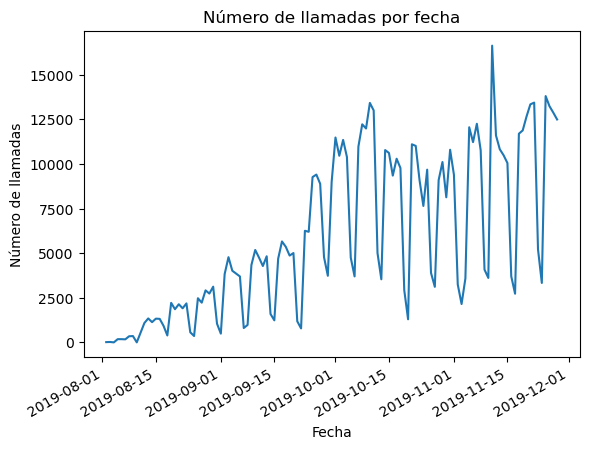

In [28]:
# Se saca el número de llamadas por fecha y se visualiza

print('Número de llamadas totales:', dataset_daily['calls_count'].sum())

calls_per_date = dataset_daily.groupby('date')['calls_count'].sum()
calls_per_date.plot(title='Número de llamadas por fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de llamadas')
plt.show()

Se analiza la distribución de los valores de cada columna, y si aplica, se identifican valores atípicos y se eliminan.

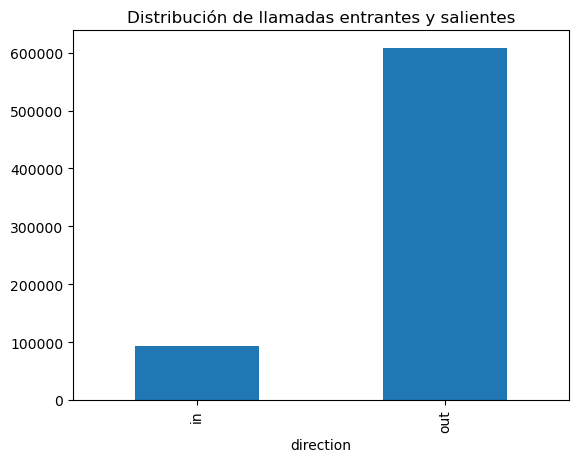

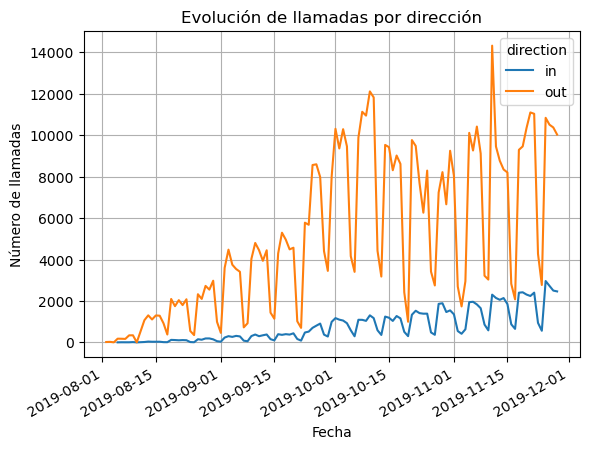

In [29]:
# Se revisa la distribución de la columna 'direction'

direction_columns = dataset.groupby('direction')['calls_count'].sum()
direction_columns.plot(
    kind='bar', title='Distribución de llamadas entrantes y salientes')
plt.show()

direction_per_date = dataset.pivot_table(
    index='date', columns='direction', values='calls_count', aggfunc='sum')
direction_per_date.plot(title='Evolución de llamadas por dirección', grid=True)
plt.xlabel('Fecha')
plt.ylabel('Número de llamadas')
plt.show()

Se observa que la mayoría de las llamadas registradas son hechas por los operadores (son llamadas salientes) y que hay un patrón de subidas y bajadas que se deduce que es por los días laborales y de descanso.

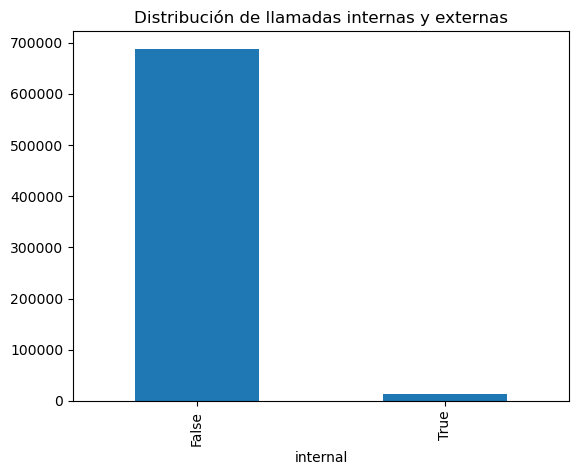

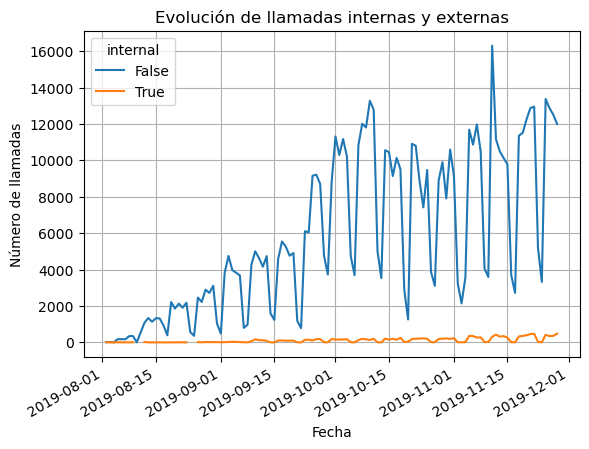

In [30]:
# Se revisa la distribución de la columna 'internal'

internal_columns = dataset.groupby('internal')['calls_count'].sum()
internal_columns.plot(
    kind='bar', title='Distribución de llamadas internas y externas')
plt.show()

internal_per_date = dataset.pivot_table(
    index='date', columns='internal', values='calls_count', aggfunc='sum')
internal_per_date.plot(
    title='Evolución de llamadas internas y externas', grid=True)
plt.xlabel('Fecha')
plt.ylabel('Número de llamadas')
plt.show()

Se observa que casi todas las llamadas son externas, muy pocas son hechas entre los mismos operadores.

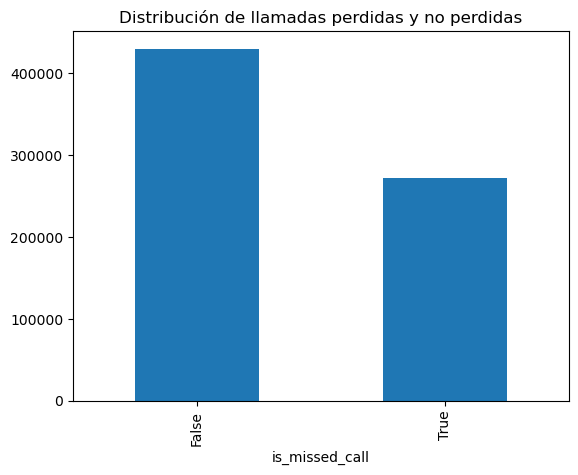

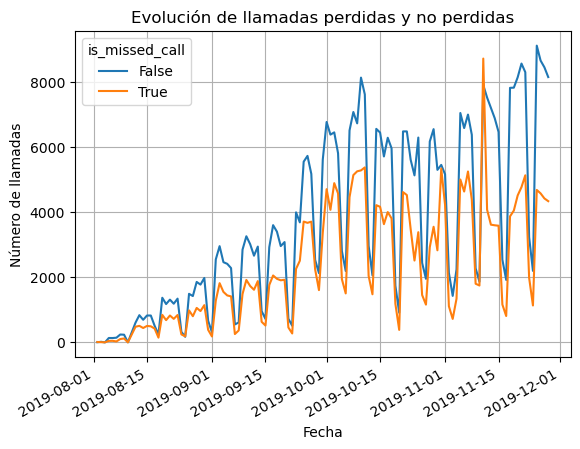

In [31]:
# Se revisa la distribución de la columna 'is_missed_call'

missed_columns = dataset.groupby('is_missed_call')['calls_count'].sum()
missed_columns.plot(
    kind='bar', title='Distribución de llamadas perdidas y no perdidas')
plt.show()

missed_per_date = dataset.pivot_table(
    index='date', columns='is_missed_call', values='calls_count', aggfunc='sum')
missed_per_date.plot(
    title='Evolución de llamadas perdidas y no perdidas', grid=True)
plt.xlabel('Fecha')
plt.ylabel('Número de llamadas')
plt.show()

Se observa que hay un porcentaje importante de llamadas perdidas, más o menos un 25% de las llamadas recibidas no son contestadas, incluso teniendo una día con mása llamadas perdidas que no perdidas.

### 3.2 Determinación de datos atípicos

Se hace un pequeño análisis estadístico de los valores totales por día (datatset `dataset_daily`).

In [32]:
# Se analizan la información estadística de las columnas numéricas del dataframe 'dataset_daily'

print(dataset_daily[['calls_count', 'call_duration', 'wait_time', 'missed_calls_count',
      'missed_wait_time', 'avg_call_duration', 'avg_wait_time', 'avg_missed_wait_time', 'missed_calls_ratio']].describe())

        calls_count  call_duration     wait_time  missed_calls_count  \
count  19635.000000   19635.000000  19635.000000        19635.000000   
mean      35.734403    2135.348816    659.408913           13.844716   
std      114.241597    5903.268982   2333.662504           64.683794   
min        1.000000       0.000000      0.000000            0.000000   
25%        2.000000     144.000000     33.000000            0.000000   
50%        9.000000     700.000000    125.000000            1.000000   
75%       32.000000    2234.000000    517.500000            9.000000   
max     5022.000000  145006.000000  60891.000000         4817.000000   

       missed_wait_time  avg_call_duration  avg_wait_time  \
count      19635.000000       19635.000000   19635.000000   
mean         319.730379          91.807991      16.620970   
std         1325.063053         125.268797       9.973845   
min            0.000000           0.000000       0.000000   
25%            0.000000          31.160000    

Se puede notar que hay datos atípicos con la información estadística que vemos

#### Calls_count

Empezaremos a analizar la columna `calls_count` y determinar los datos atípicos.

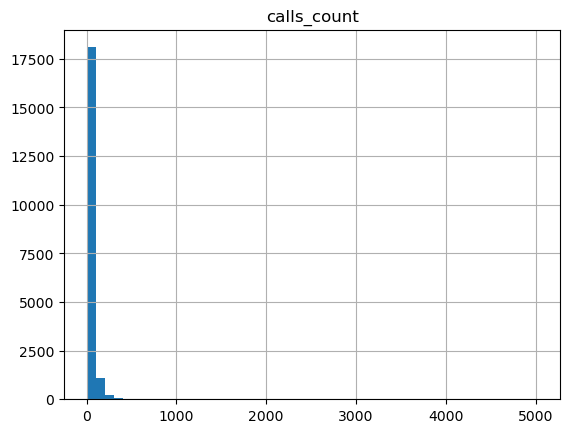

In [33]:
# Se revisa la distribución de la columna 'calls_count'

dataset_daily.hist(column='calls_count', bins=50)
plt.show()

Se observa que la mayoría de los operadores no hacen más de 100 o 200 llamadas al día, pero por los datos atípicos es difícil notarlo en el histograma. Se procede a hacer una gráfica de dispersión para ver más a detalle.

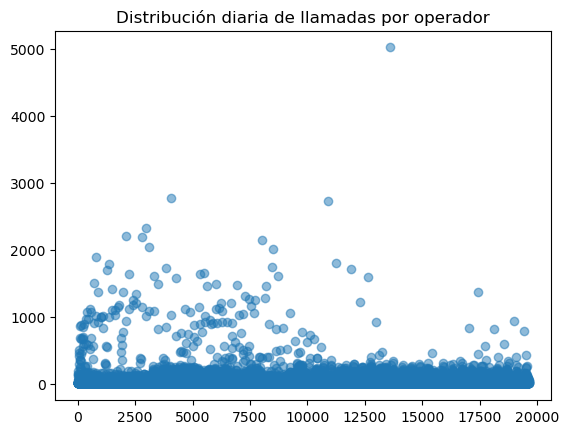

In [34]:
# Se crea un índice para poder crear posteriormente el gráfico de dispersión

x_values = pd.Series(range(0, len(dataset_daily)))
plt.scatter(x_values, dataset_daily['calls_count'], alpha=0.5)
plt.title('Distribución diaria de llamadas por operador')
plt.show()

Se sigue sin poder notar con claridad la distribución por el hecho de que hay datos atípicos por arriba de 2000 e incluso de 5000 llamadas al día.  
Para definir los datos atípicos se calcularán los percentiles 90, 95 y 99 de la distribución diaria de llamadas por operador.

In [35]:
# Se calculan los percentiles 90, 95 y 99 de la distribución diaria de llamadas por operador

print('Percentiles 90, 95 y 99 de la distribución diaria de llamadas por operador:',
      np.percentile(dataset_daily['calls_count'], [90, 95, 99]))

Percentiles 90, 95 y 99 de la distribución diaria de llamadas por operador: [ 85.  133.3 347. ]


Se determina que los datos atípicos de la distribución diaria de llamadas por operador caen en más de 133 llamadas al día.

#### Avg_call_duration

Ahora seguimos por la columna `avg_call_duration`.

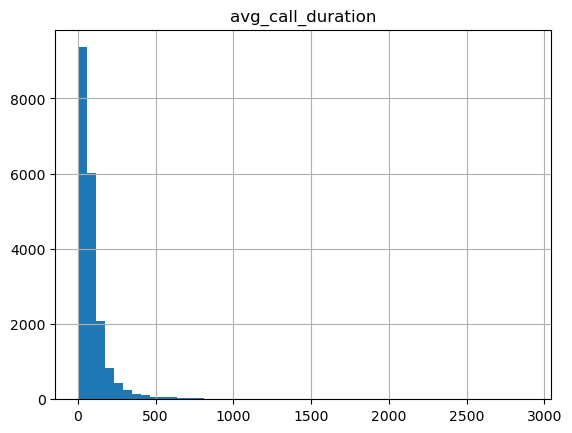

In [36]:
# Se revisa la distribución de la columna 'avg_call_duration'

dataset_daily.hist(column='avg_call_duration', bins=50)
plt.show()

Se observa que la mayoría de los operadores no tardan más de 100 o 150 segundos por llamada, pero por los datos atípicos es difícil notarlo en el histograma. Se procede a hacer una gráfica de dispersión para ver más a detalle.

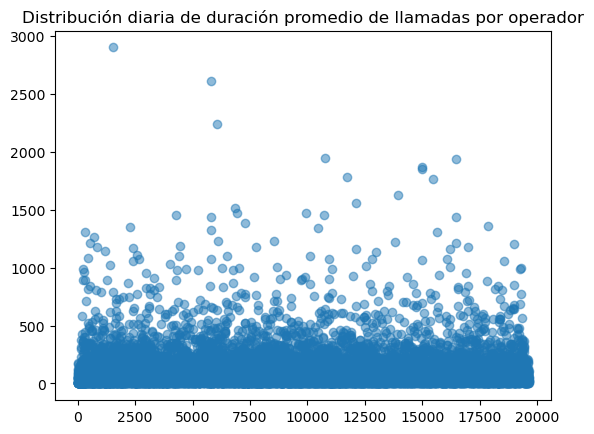

In [37]:
# Se crea un índice para poder crear posteriormente el gráfico de dispersión

x_values = pd.Series(range(0, len(dataset_daily)))
plt.scatter(x_values, dataset_daily['avg_call_duration'], alpha=0.5)
plt.title('Distribución diaria de duración promedio de llamadas por operador')
plt.show()

Ya se nota con mayor claridad la distribución y se podría intuir que los datos atípicos empiezan desde los 500 segundos por llamada.  
Para definir los datos atípicos se calcularán los percentiles 90, 95 y 99 de la distribución diaria de duración promedio de llamadas por operador.

In [38]:
# Se calculan los percentiles 90, 95 y 99 de la distribución diaria de tiempo promedio de espera por operador

print('Percentiles 90, 95 y 99 de la distribución diaria de duración promedio de llamadas por operador:',
      np.percentile(dataset_daily['avg_call_duration'], [90, 95, 99]))

Percentiles 90, 95 y 99 de la distribución diaria de duración promedio de llamadas por operador: [183.71 275.   624.33]


Se determina que los datos atípicos de la distribución diaria de duración promedio de llamadas por operador caen en más de 275 segundos.

#### Avg_wait_time

Después seguimos por la columna `avg_call_duration`.

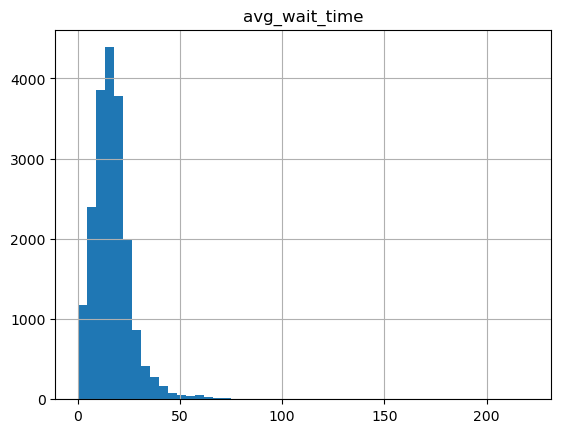

In [39]:
# Se revisa la distribución de la columna 'avg_wait_time'

dataset_daily.hist(column='avg_wait_time', bins=50)
plt.show()

Se observa que la mayoría de los operadores no tienen un promedio de tiempo de espera mayor a 25 segundos. Se procede a hacer una gráfica de dispersión para ver más a detalle.

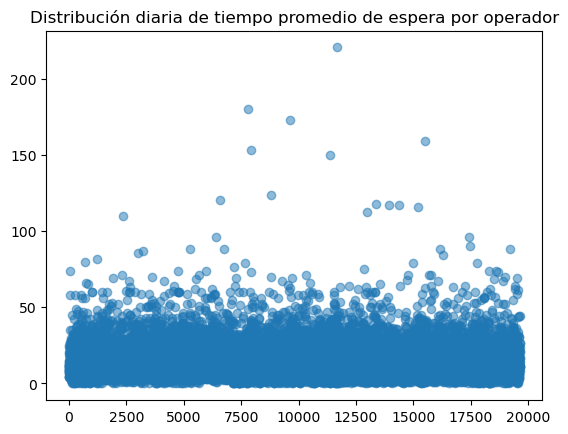

In [40]:
# Se crea un índice para poder crear posteriormente el gráfico de dispersión

x_values = pd.Series(range(0, len(dataset_daily)))
plt.scatter(x_values, dataset_daily['avg_wait_time'], alpha=0.5)
plt.title('Distribución diaria de tiempo promedio de espera por operador')
plt.show()

Ya se nota con mayor claridad la distribución y se podría intuir que los datos atípicos empiezan desde los 50 segundos de tiempo de espera.  
Para definir los datos atípicos se calcularán los percentiles 90, 95 y 99 de la distribución diaria de tiempo promedio de espera por operador.

In [41]:
# Se calculan los percentiles 90, 95 y 99 de la distribución diaria de tiempo promedio de espera por operador

print('Percentiles 90, 95 y 99 de la distribución diaria de tiempo promedio de espera por operador:',
      np.percentile(dataset_daily['avg_wait_time'], [90, 95, 99]))

Percentiles 90, 95 y 99 de la distribución diaria de tiempo promedio de espera por operador: [26.716  32.253  51.7228]


Se determina que los datos atípicos de la distribución diaria de tiempo promedio de espera por operador cae en más de 32.253 segundos.

#### Missed_calls_count

Por último terminamos con la columna `missed_calls_count`

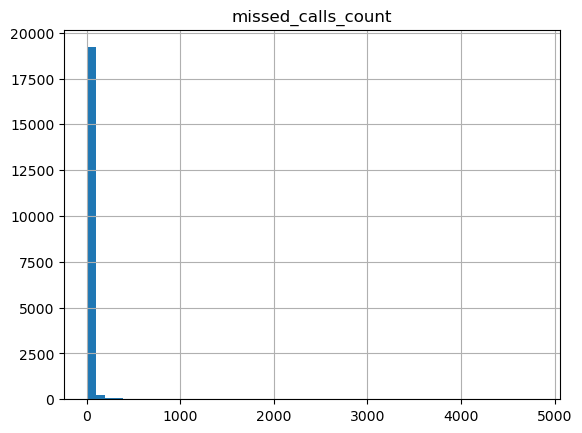

In [42]:
# Se revisa la distribución de la columna 'missed_calls_count'

dataset_daily.hist(column='missed_calls_count', bins=50)
plt.show()

Se observa que la mayoría de los operadores no tienen más de 100 llamadas perdidas al día, pero por los datos atípicos es difícil notarlo en el histograma. Se procede a hacer una gráfica de dispersión para ver más a detalle.

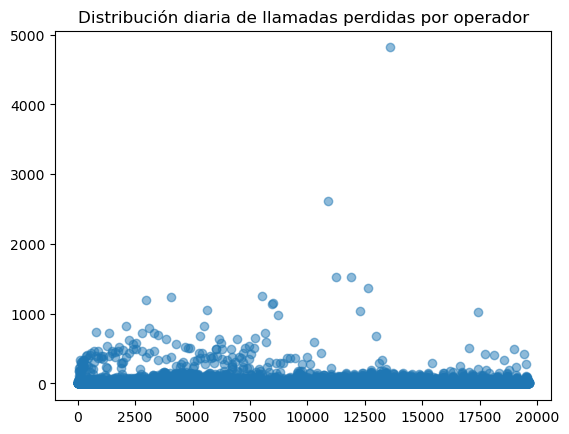

In [43]:
# Se crea un índice para poder crear posteriormente el gráfico de dispersión

x_values = pd.Series(range(0, len(dataset_daily)))
plt.scatter(x_values, dataset_daily['missed_calls_count'], alpha=0.5)
plt.title('Distribución diaria de llamadas perdidas por operador')
plt.show()

Se sigue sin poder notar con claridad la distribución por el hecho de que hay datos atípicos por arriba de 1000 e incluso casi llegando a las 5000 llamadas al día.  
Para definir los datos atípicos se calcularán los percentiles 90, 95 y 99 de la distribución diaria de llamadas perdidas por operador.

In [44]:
# Se calculan los percentiles 90, 95 y 99 de la distribución diaria de llamadas perdidas por operador

print('Percentiles 90, 95 y 99 de la distribución diaria de llamadas perdidas por operador:',
      np.percentile(dataset_daily['missed_calls_count'], [90, 95, 99]))

Percentiles 90, 95 y 99 de la distribución diaria de llamadas perdidas por operador: [ 31.  59. 161.]


Se determina que los datos atípicos de la distribución diaria de llamadas perdidas por operador caen en más de 59 llamadas.

#### Eliminación de datos atípicos

Ahora procedemos a eliminar todos los datos atípicos según lo previamente establecido.

In [45]:
# Se eliminan los datos atípicos de la distribución diaria de llamadas por operador
dataset_daily = dataset_daily[dataset_daily['calls_count'] <= 133]

# Se eliminan los datos atípicos de la distribución diaria de duración promedio de llamadas por operador
dataset_daily = dataset_daily[dataset_daily['avg_call_duration'] <= 275]

# Se eliminan los datos atípicos de la distribución diaria de tiempo promedio de espera por operador
dataset_daily = dataset_daily[dataset_daily['avg_wait_time'] <= 32.253]

# Se eliminan los datos atípicos de la distribución diaria de llamadas perdidas por operador
dataset_daily = dataset_daily[dataset_daily['missed_calls_count'] <= 59]

Se vuelven a sacar los datos estadísticos para saber cómo ha cambiado la información

In [46]:
print(dataset_daily[['calls_count', 'call_duration', 'wait_time', 'missed_calls_count',
      'missed_wait_time', 'avg_call_duration', 'avg_wait_time', 'avg_missed_wait_time', 'missed_calls_ratio']].describe())

        calls_count  call_duration     wait_time  missed_calls_count  \
count  16577.000000   16577.000000  16577.000000        16577.000000   
mean      20.751222    1409.407553    340.532545            6.382156   
std       26.952565    1990.022953    500.916772           10.916922   
min        1.000000       0.000000      0.000000            0.000000   
25%        3.000000     127.000000     29.000000            0.000000   
50%        9.000000     606.000000    118.000000            1.000000   
75%       29.000000    1884.000000    445.000000            7.000000   
max      133.000000   16617.000000   3593.000000           59.000000   

       missed_wait_time  avg_call_duration  avg_wait_time  \
count      16577.000000       16577.000000   16577.000000   
mean         140.942330          72.565232      14.874545   
std          260.180967          56.228234       6.938352   
min            0.000000           0.000000       0.000000   
25%            0.000000          31.500000    

Número de llamadas totales: 343993


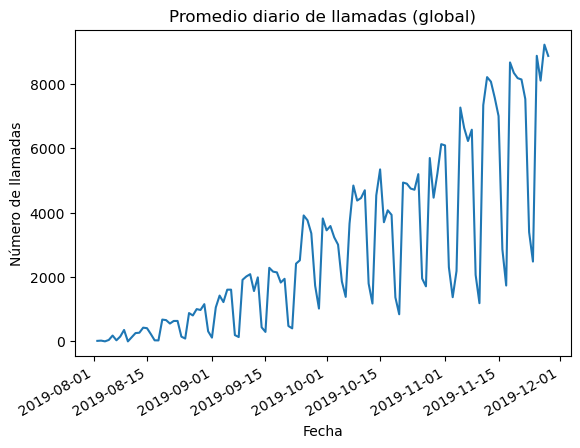

In [47]:
# Se saca el promedio diario de llamadas (global) y se visualiza

print('Número de llamadas totales:', dataset_daily['calls_count'].sum())

calls_per_date = dataset_daily.groupby('date')['calls_count'].sum()
calls_per_date.plot(title='Promedio diario de llamadas (global)')
plt.xlabel('Fecha')
plt.ylabel('Número de llamadas')
plt.show()

### 3.2 Analizar proporción de llamadas perdidas por operador.

Se genera una función para sacar diferentes gráficas de las variables `calls_count`, `missed_calls_count` y `missed_calls_ratio`

In [48]:
def plot_operator_metrics(column_name):
    """
    Genera 3 gráficos para la métrica dada:
    1. Histograma crudo por operador/día (distribución diaria de la métrica)
    2. Promedio global por día (línea)
    3. Promedio histórico por operador (histograma)
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 fila, 3 columnas

    # 1. Histograma crudo (nivel operador + día)
    dataset_daily[column_name].hist(ax=axes[0], bins=30)
    axes[0].set_title(f'{column_name} - Operador/Día')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Frecuencia')

    # 2. Promedio diario global (línea temporal)
    daily_avg = dataset_daily.groupby('date')[column_name].mean()
    daily_avg.plot(ax=axes[1], kind='line')
    axes[1].set_title(f'{column_name} - Promedio Diario')
    axes[1].set_xlabel('Fecha')
    axes[1].set_ylabel('Promedio')

    # 3. Promedio histórico por operador
    operator_avg = dataset_daily.groupby('operator_id')[column_name].mean()
    operator_avg.hist(ax=axes[2], bins=30)
    axes[2].set_title(f'{column_name} - Promedio Histórico por Operador')
    axes[2].set_xlabel(column_name)
    axes[2].set_ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

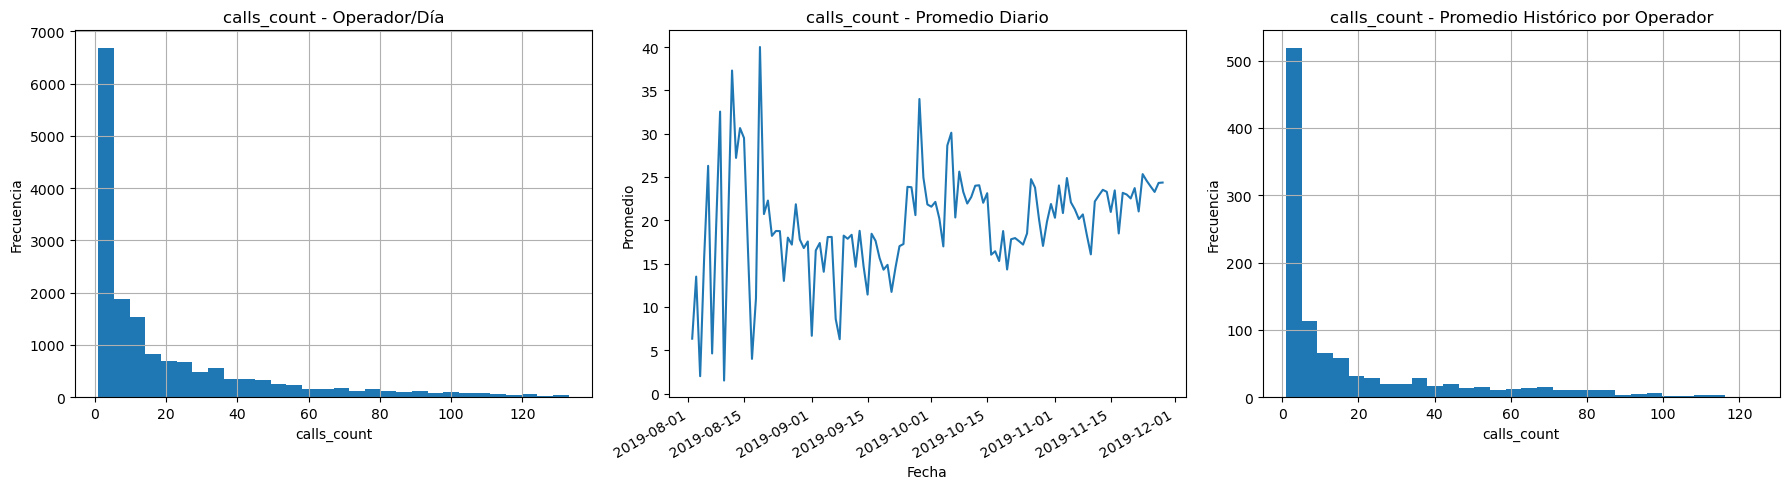

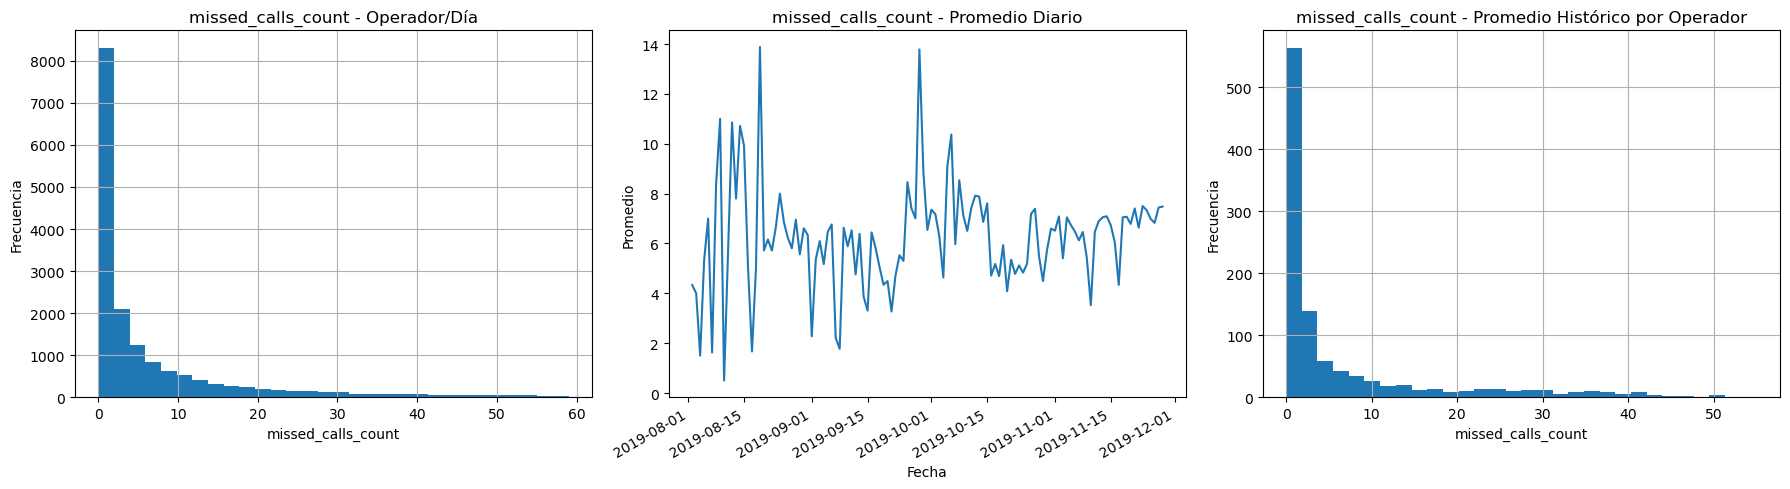

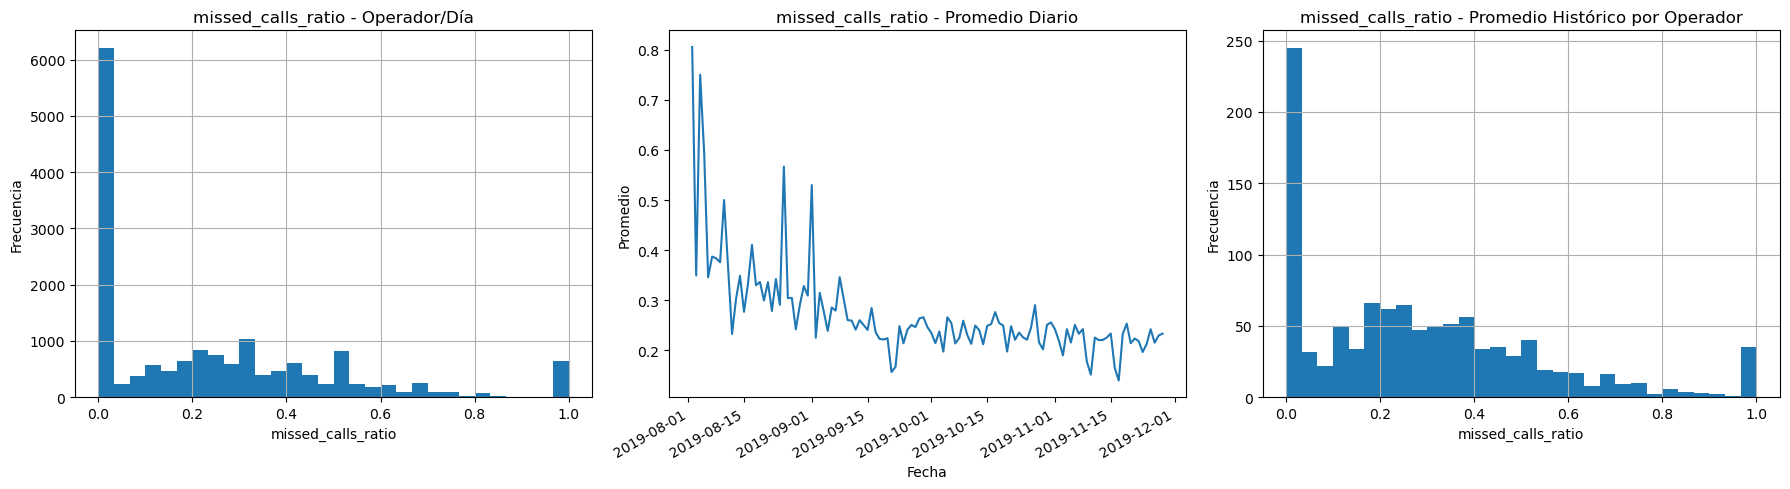

In [49]:
plot_operator_metrics('calls_count')
plot_operator_metrics('missed_calls_count')
plot_operator_metrics('missed_calls_ratio')

Ahora se hace una función para sacar la información estadística sobre cada unade las columnas tanto parar la distribución diaria como para el promedio histórico por operador

In [50]:
def statistics_summary(column_name):
    """
    Muestra un resumen estadístico para la métrica dada:
    - Cantidad de datos (n)
    - Media
    - Desviación estándar
    - Valores mínimo y máximo
    - Mediana
    - Valores atípicos (outliers) usando los percentiles 90, 95 y 99
    """
    data_daily_distribution = dataset_daily[column_name].describe(percentiles=[0.9, 0.95, 0.99])
    data_per_operator = dataset_daily.groupby('operator_id')[column_name].mean().describe(percentiles=[0.9, 0.95, 0.99])

    print(f'Estadísticas para {column_name} - Distribución diaria por operador:')
    print(data_daily_distribution)
    print()
    print(f'Estadísticas para {column_name} - Promedio histórico por operador:')
    print(data_per_operator)
    print()

In [51]:
statistics_summary('calls_count')
statistics_summary('missed_calls_count')
statistics_summary('missed_calls_ratio')

Estadísticas para calls_count - Distribución diaria por operador:
count    16577.000000
mean        20.751222
std         26.952565
min          1.000000
50%          9.000000
90%         60.000000
95%         84.000000
99%        117.000000
max        133.000000
Name: calls_count, dtype: float64

Estadísticas para calls_count - Promedio histórico por operador:
count    1066.000000
mean       18.056504
std        25.037003
min         1.000000
50%         5.450794
90%        58.666667
95%        76.529412
99%       100.391667
max       124.500000
Name: calls_count, dtype: float64

Estadísticas para missed_calls_count - Distribución diaria por operador:
count    16577.000000
mean         6.382156
std         10.916922
min          0.000000
50%          1.000000
90%         20.000000
95%         31.000000
99%         52.000000
max         59.000000
Name: missed_calls_count, dtype: float64

Estadísticas para missed_calls_count - Promedio histórico por operador:
count    1066.000000
mean  

### 3.3 Analizar la duración de llamadas y tiempos de espera por operador.

Se usa la función `plot_operator_metrics` para sacar diferentes gráficas de las variables

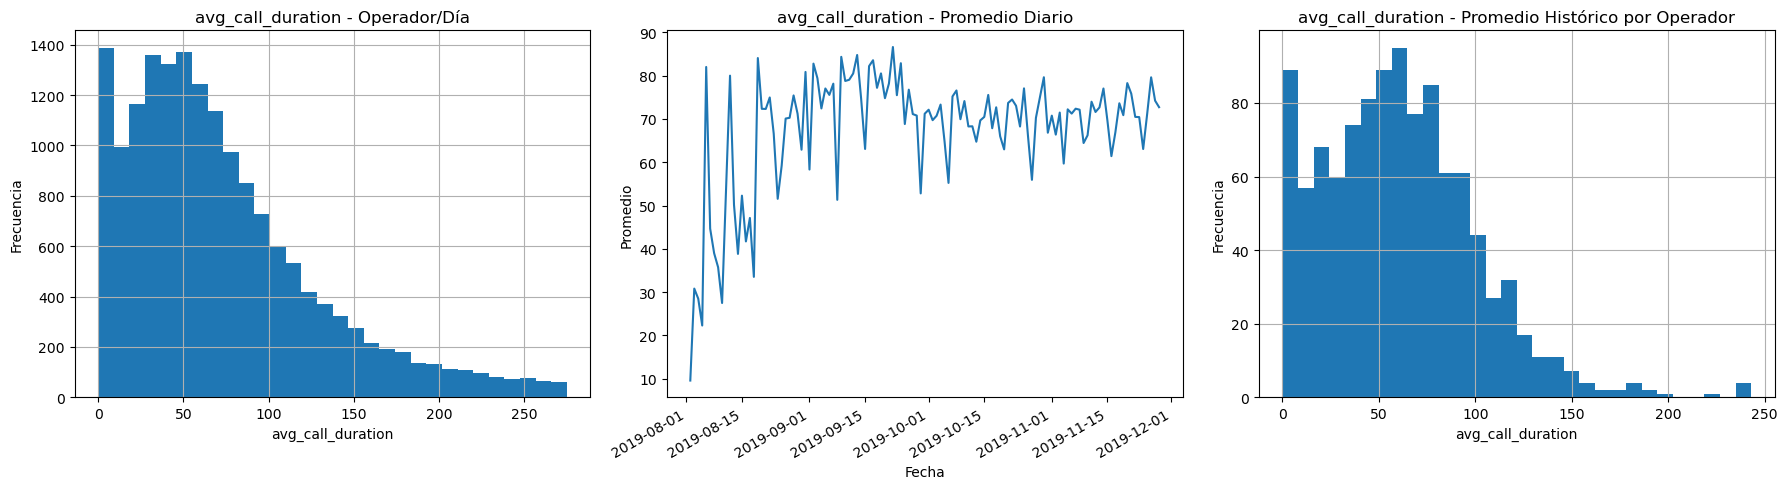

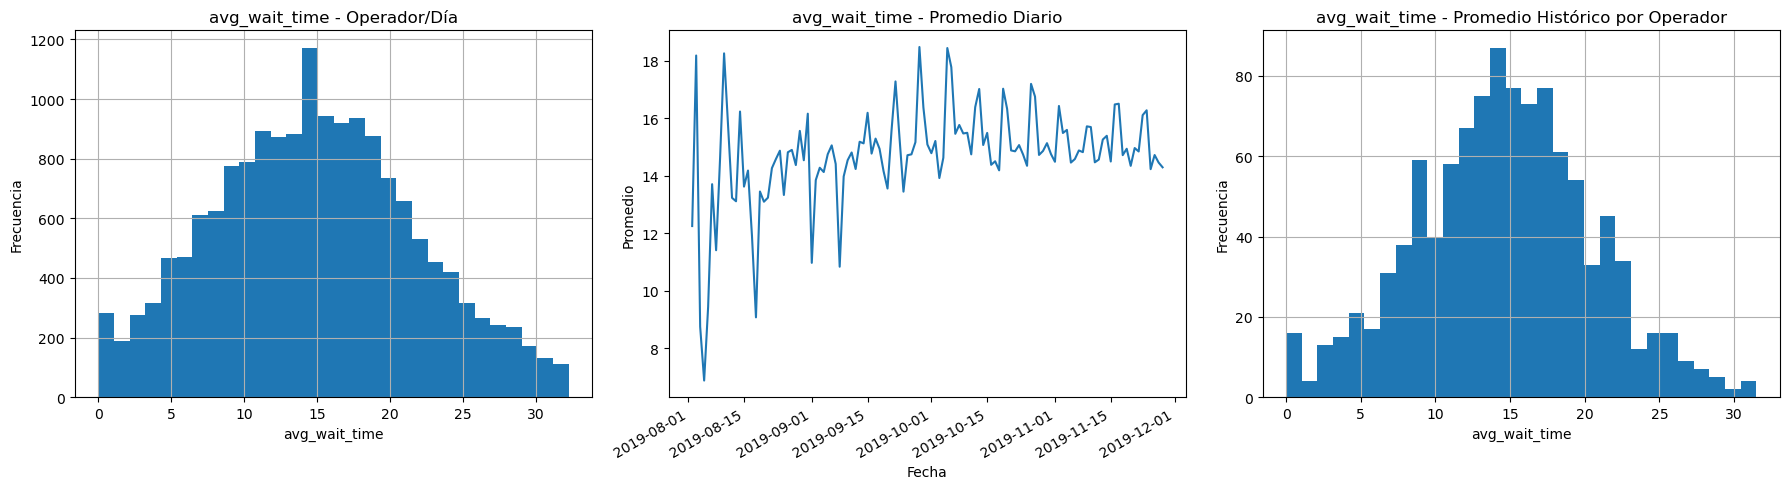

In [52]:
plot_operator_metrics('avg_call_duration')
plot_operator_metrics('avg_wait_time')

Se usa la función `statistics_summary` para sacar la información estadística de las variables

In [53]:
statistics_summary('avg_call_duration')
statistics_summary('avg_wait_time')

Estadísticas para avg_call_duration - Distribución diaria por operador:
count    16577.000000
mean        72.565232
std         56.228234
min          0.000000
50%         60.000000
90%        150.770000
95%        190.268000
99%        251.640000
max        275.000000
Name: avg_call_duration, dtype: float64

Estadísticas para avg_call_duration - Promedio histórico por operador:
count    1066.000000
mean       60.614460
std        39.364631
min         0.000000
50%        57.675000
90%       110.613333
95%       126.960000
99%       183.087500
max       243.000000
Name: avg_call_duration, dtype: float64

Estadísticas para avg_wait_time - Distribución diaria por operador:
count    16577.000000
mean        14.874545
std          6.938352
min          0.000000
50%         14.820000
90%         24.144000
95%         27.000000
99%         31.000000
max         32.250000
Name: avg_wait_time, dtype: float64

Estadísticas para avg_wait_time - Promedio histórico por operador:
count    1066.0000

### 3.4 Correlaciones relevantes entre las diferentes columnas.

Se indaga si hay alguna correlación importante entre las diferentes métricas tanto en la ditribución diaria por operador como en el promedio histórico por operador.

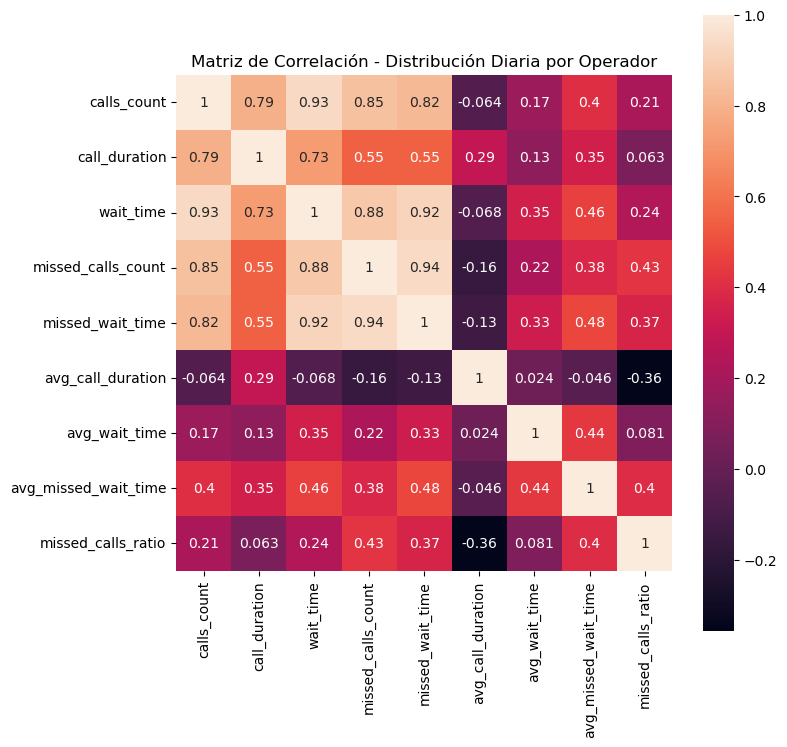

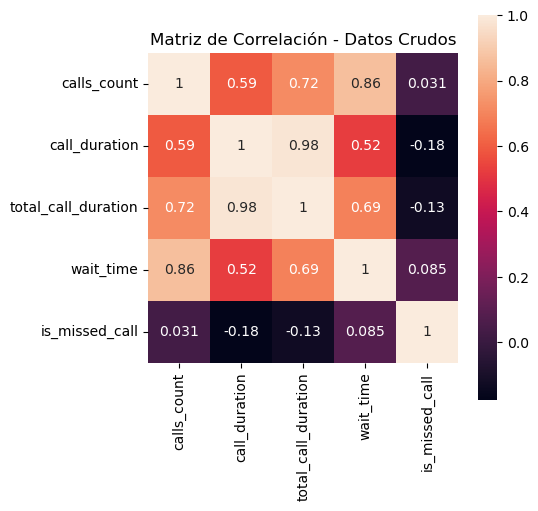

In [54]:
# Se analiza la correlación entre las variables numéricas del dataframe 'dataset_daily'
correlation_matrix_daily = dataset_daily[['calls_count', 'call_duration', 'wait_time', 'missed_calls_count',
                                          'missed_wait_time', 'avg_call_duration', 'avg_wait_time', 'avg_missed_wait_time', 'missed_calls_ratio']].corr()

# Se analiza la correlación entre las variables numéricas del dataframe 'dataset'
correlation_matrix = dataset[['calls_count', 'call_duration', 'total_call_duration', 'wait_time', 'is_missed_call']].corr()


# Se visualizan las matrices de correlación usando un mapa de calor
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix_daily, annot=True, square=True)
plt.title('Matriz de Correlación - Distribución Diaria por Operador')
plt.show()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, square=True)
plt.title('Matriz de Correlación - Datos Crudos')
plt.show()

No se puede notar alguna correlación importante, fuera de aquellas correlaciones evidentes como que mientras más número de llamadas más duración de llamadas.

Tal vez la que me puede sorprender un poco es la relación bastante importante entre el promedio de duración de llamada y la proporción de lamadas perdidas.

## 4. Definición de Métricas de Ineficacia  

Las métricas que se utilizarán para definir y distinguir a un operador ineficiente de uno eficiente serán las siguientes:

- Alto número de llamadas perdidas.
- Alto tiempo de espera promedio.
- Alta proporción de llamadas perdidas.

Aquellos operadores que tengan 2 o más de estas características serán considerados ineficientes.

## 5. Identificación de Operadores Ineficaces

Para cada métrica utilizada en la evaluación de operadores, se definirán los percentiles que determinarán cuándo un operador se considera ineficiente:

- Número de llamadas perdidas: se considerará ineficiente a los operadores cuyo número de llamadas perdidas se encuentre en el percentil 75 o superior.
- Tiempo de espera promedio: se considerará ineficiente a los operadores cuyo tiempo de espera promedio esté en el percentil 75 o superior.
- Proporción de llamadas perdidas: se considerará ineficiente a los operadores cuya proporción de llamadas perdidas se encuentre en el percentil 75 o superior.

De esta forma, se identifican los operadores que presentan desempeño significativamente por encima de la media en términos negativos, permitiendo un análisis objetivo de la ineficiencia.

Se genera el dataset con todos los promedios históricos de los operadores de las métricas de interés.

In [55]:
# Se crea el dataset con los promedios históricos de las métricas de interés por operador

operator_metrics = dataset_daily.groupby('operator_id', as_index=False).agg(
    {'missed_calls_count': 'mean', 'avg_wait_time': 'mean', 'missed_calls_ratio': 'mean'})
print(operator_metrics)

      operator_id  missed_calls_count  avg_wait_time  missed_calls_ratio
0          879896            5.023256      13.100930            0.346333
1          879898           23.382353      13.624118            0.349068
2          880020            1.571429       5.953571            0.196429
3          880022            2.416667      12.619722            0.344592
4          880026            8.415584       9.867403            0.282531
...           ...                 ...            ...                 ...
1061       972408            2.000000       7.500000            0.333300
1062       972410           18.500000      18.670000            0.470000
1063       972412           12.500000      17.605000            0.421000
1064       972460           14.000000      12.620000            0.560900
1065       973120            2.000000       6.670000            0.666700

[1066 rows x 4 columns]


Se procede a determinar los valores exactos del percentil 75 del promedio histórico por operador para cada métrica.

In [56]:
# Percentil 75 de las métricas seleccionadas del promedio histórico por operador

print('Percentil 75 de llamadas perdidas por operador:',
      np.percentile(operator_metrics['missed_calls_count'], 75).round(2))
print('Percentil 75 de tiempo promedio de espera por operador:',
      np.percentile(operator_metrics['avg_wait_time'], 75).round(2))
print('Percentil 75 de proporción de llamadas perdidas por operador:',
      np.percentile(operator_metrics['missed_calls_ratio'], 75).round(2))

Percentil 75 de llamadas perdidas por operador: 7.09
Percentil 75 de tiempo promedio de espera por operador: 18.34
Percentil 75 de proporción de llamadas perdidas por operador: 0.42


Se procede a indentificar a los operadores que cumplan los criterios de ineficacia.

In [57]:
# Se filtran a los operadores que se encuentran en el percentil 75 o superior en al menos dos de las tres métricas seleccionadas

inefficient_operators = operator_metrics[
    ((operator_metrics['missed_calls_count'] >= np.percentile(operator_metrics['missed_calls_count'], 75)).astype(int) +
     (operator_metrics['avg_wait_time'] >= np.percentile(operator_metrics['avg_wait_time'], 75)).astype(int) +
     (operator_metrics['missed_calls_ratio'] >= np.percentile(operator_metrics['missed_calls_ratio'], 75)).astype(int)) >= 2
]
print(inefficient_operators.sort_values(
    ['missed_calls_count', 'avg_wait_time', 'missed_calls_ratio'], ascending=False))

     operator_id  missed_calls_count  avg_wait_time  missed_calls_ratio
927       952466           55.000000      16.090000            0.625000
882       947658           52.625000      18.975000            0.599425
436       919374           51.200000      23.524000            0.460100
711       938070           51.000000      25.350000            0.463600
486       921594           50.833333      21.016667            0.467700
..           ...                 ...            ...                 ...
950       954376            1.000000      20.250000            0.500000
773       940814            1.000000      19.500000            0.500000
670       937716            1.000000      19.000000            1.000000
680       937778            1.000000      19.000000            1.000000
112       894232            1.000000      18.444444            0.638889

[204 rows x 4 columns]


In [58]:
# Se calcula el total de operadores, el total de operadores ineficaces y su proporción

total_operators = operator_metrics['operator_id'].nunique()
inefficient_count = inefficient_operators['operator_id'].nunique()
print('Total de operadores:', total_operators)
print('Total de operadores ineficaces:', inefficient_count)
print('Proporción de operadores ineficaces:', round((inefficient_count / total_operators) * 100, 2), '%')

Total de operadores: 1066
Total de operadores ineficaces: 204
Proporción de operadores ineficaces: 19.14 %


In [59]:
# Se filtran los demás operadores eficaces

efficient_operators = operator_metrics[~operator_metrics['operator_id'].isin(inefficient_operators['operator_id'])]
print(efficient_operators.sort_values(
    ['missed_calls_count', 'avg_wait_time', 'missed_calls_ratio'], ascending=False))

      operator_id  missed_calls_count  avg_wait_time  missed_calls_ratio
438        919378           41.000000      17.150000            0.418400
630        934426           36.666667      18.040000            0.333367
659        937372           35.333333      14.486667            0.416733
824        945284           32.777778      18.196667            0.331617
446        919490           29.600000      15.932000            0.351580
...           ...                 ...            ...                 ...
936        952954            0.000000       1.000000            0.000000
1039       968520            0.000000       1.000000            0.000000
136        896020            0.000000       0.960000            0.000000
938        952982            0.000000       0.833333            0.000000
588        930692            0.000000       0.830000            0.000000

[862 rows x 4 columns]


Se observa que casi el 20% cumple con nuestras métricas de ineficiencia, lo cual podríamos decir que son buenas noticias considerando que teníamos un rango del 25% de cada métrica para que se pudieran considerar operadores ineficientes.

Aún no podemos decir que nuestros criterios nos determinan confiablemente si un operador es o no ineficaz, por lo que se procede a probar hipótesis respecto a estas métricas.

## 6. Prueba de Hipótesis

Las hipótesis a probar son las siguientes:

- Hipóesis: Número de llamadas perdidas

    - Hipótesis nula: El número promedio de llamadas perdidas de los operadores "ineficientes" y de los operadores "eficientes" es el mismo.
    - Hipótesis alternativa: El número promedio de llamadas perdidas de los operadores "ineficientes" y de los operadores "eficientes" es diferente.

- Hipóesis: Tiempo de espera promedio

    - Hipótesis nula: El tiempo de espera promedio de los operadores "ineficientes" y de los operadores "eficientes" es el mismo.
    - Hipótesis alternativa: El tiempo de espera promedio de los operadores "ineficientes" y de los operadores "eficientes" es diferente.

- Hipóesis: Proporción de llamadas perdidas

    - Hipótesis nula: La proporción de llamadas perdidas de los operadores "ineficientes" y de los operadores "eficientes" es el mismo.
    - Hipótesis alternativa: La proporción de llamadas perdidas de los operadores "ineficientes" y de los operadores "eficientes" es diferente.

Se crea una función para hacer la comparación de las métricas entre ambos grupos (se determina el nivel de significancia en 0.05) y se hacen las pruebas.

In [60]:
def hypothesis(dfA, dfB, alfa=0.05):             
    
    metrics = ['missed_calls_count', 'avg_wait_time', 'missed_calls_ratio']

    for metric in metrics:
        A = dfA[metric]
        B = dfB[metric]
    
        shapiroA = st.shapiro(A)
        shapiroB = st.shapiro(B)

        shapiroA_p = shapiroA[1]
        shapiroB_p = shapiroB[1]

        print()
        print('Métrica:', metric)

        if (shapiroA_p >= alfa and shapiroB_p >= alfa):
            tt = st.ttest_ind(A, B, equal_var=False)
            print("Prueba: t-test independiente")
            if tt.pvalue < alfa:
                print("Se rechaza la hipótesis nula: hay una diferencia significativa entre los grupos")
            else:
                print("No se puede rechazar la hipótesis nula: no hay razón para pensar que los grupos son diferentes")
        else:
            mw = st.mannwhitneyu(A, B)
            print("Prueba: Mann-Whitney U")
            if mw.pvalue < alfa:
                print("Se rechaza la hipótesis nula: hay una diferencia significativa entre los grupos")
            else:
                print("No se puede rechazar la hipótesis nula: no hay razón para pensar que los grupos son diferentes")

In [61]:
hypothesis(efficient_operators, inefficient_operators)


Métrica: missed_calls_count
Prueba: Mann-Whitney U
Se rechaza la hipótesis nula: hay una diferencia significativa entre los grupos

Métrica: avg_wait_time
Prueba: Mann-Whitney U
Se rechaza la hipótesis nula: hay una diferencia significativa entre los grupos

Métrica: missed_calls_ratio
Prueba: Mann-Whitney U
Se rechaza la hipótesis nula: hay una diferencia significativa entre los grupos


## 7. Conclusiones y Recomendaciones

Podemos observa que nuestra división de los operadores según su eficiencia con el percentil 75 es más que efectiva para reconocer a los operadores ineficientes.
Por este motivo se recomienda atender estas 3 métricas clave para mejorar el rendimiento no solo de los operadores ineficientes si no de todos.